# Import necessary libraries

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the dataset

In [2]:
# Step 2: Load the dataset
data = pd.read_csv('/Users/rishikadhingra/Desktop/Comparison Models/mushrooms.csv')

# Data Understanding

In [3]:
# Step 3: Data Understanding
print(data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
print(data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

# Data Preparation

In [6]:
# Step 4: Data Preparation
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

In [7]:
# Split features and target variable
X = data.drop('class', axis=1)
y = data['class']


In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Modeling

In [9]:
# Step 5: Modeling
# Initialize Random Forest and Logistic Regression classifiers
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()

In [10]:
# Train Random Forest model
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
# Train Logistic Regression model
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Train KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluation Methodology

In [13]:

# Evaluate Random Forest model
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Confusion Matrix:
 [[843   0]
 [  0 782]]


In [14]:
# Evaluate Logistic Regression model
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))


Logistic Regression Accuracy: 0.947076923076923
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Logistic Regression Confusion Matrix:
 [[798  45]
 [ 41 741]]


In [15]:
# Evaluate KNN model
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))

KNN Accuracy: 0.9963076923076923
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

KNN Confusion Matrix:
 [[837   6]
 [  0 782]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#  Feature Selection using Chi-square Test

In [16]:
# Step 7: Feature Selection using Chi-square Test

# Select top k features based on chi-square test
num_features_to_select = 10  # You can change this value as per your requirement
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

In [17]:
# Get the indices of selected features
selected_indices = selector.get_support(indices=True)


In [18]:
# Get the names of selected features
selected_features = X.columns[selected_indices]

In [19]:
print("Selected Features:", selected_features)

Selected Features: Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


In [20]:
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'KNN': knn_model
}

#  Implement and Evaluate Models:

In [21]:
#For Random Forest:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Confusion Matrix:
 [[843   0]
 [  0 782]]


In [22]:
#For Logistic Regression:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression model
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
lr_y_pred = lr_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)

# Print results
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.947076923076923
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Logistic Regression Confusion Matrix:
 [[798  45]
 [ 41 741]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#For KNN:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train KNN model
knn_model.fit(X_train, y_train)

# Evaluate KNN model
knn_y_pred = knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# Print results
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))

KNN Accuracy: 0.9963076923076923
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

KNN Confusion Matrix:
 [[837   6]
 [  0 782]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
# Create a dictionary to store the metrics
metrics_dict = {
    'Model': ['Random Forest', 'Logistic Regression', 'KNN'],
    'Accuracy': [rf_accuracy, lr_accuracy, knn_accuracy],
    'Precision': [precision_score(y_test, rf_y_pred), precision_score(y_test, lr_y_pred), precision_score(y_test, knn_y_pred)],
    'Recall': [recall_score(y_test, rf_y_pred), recall_score(y_test, lr_y_pred), recall_score(y_test, knn_y_pred)],
    'F1-score': [f1_score(y_test, rf_y_pred), f1_score(y_test, lr_y_pred), f1_score(y_test, knn_y_pred)]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Print the DataFrame
print(metrics_df)

                 Model  Accuracy  Precision   Recall  F1-score
0        Random Forest  1.000000   1.000000  1.00000  1.000000
1  Logistic Regression  0.947077   0.942748  0.94757  0.945153
2                  KNN  0.996308   0.992386  1.00000  0.996178


# Visualisations of different models


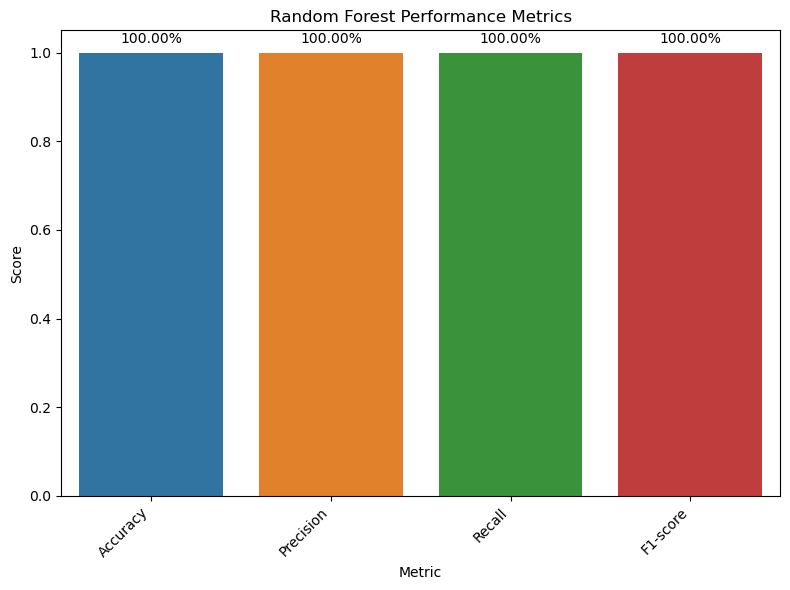

In [25]:
#For Random Forest:

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
rf_y_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1_score = f1_score(y_test, rf_y_pred)

# Create DataFrame for metrics
rf_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
})

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=rf_metrics, ax=ax)
ax.set_title('Random Forest Performance Metrics')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


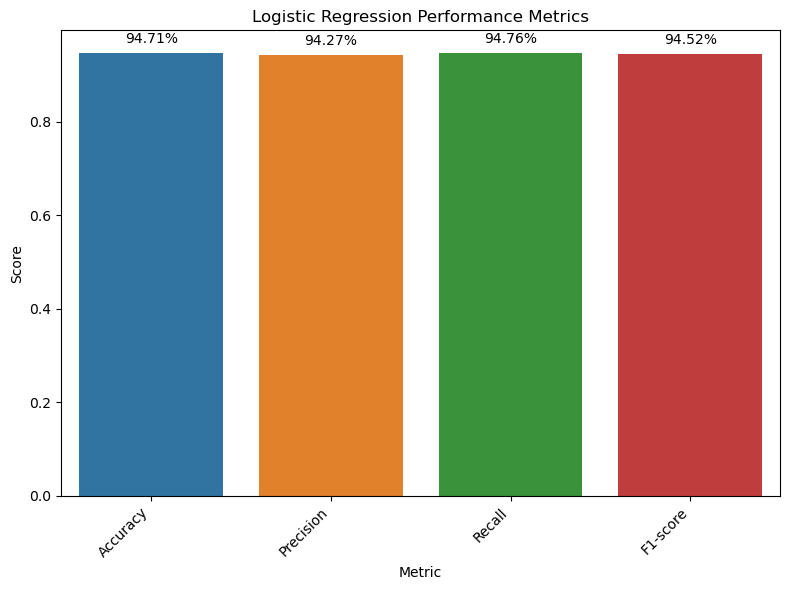

In [26]:
#For Logistic Regression:

# Train Logistic Regression model
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
lr_y_pred = lr_model.predict(X_test)

# Calculate performance metrics
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1_score = f1_score(y_test, lr_y_pred)

# Create DataFrame for metrics
lr_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [lr_accuracy, lr_precision, lr_recall, lr_f1_score]
})

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=lr_metrics, ax=ax)
ax.set_title('Logistic Regression Performance Metrics')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


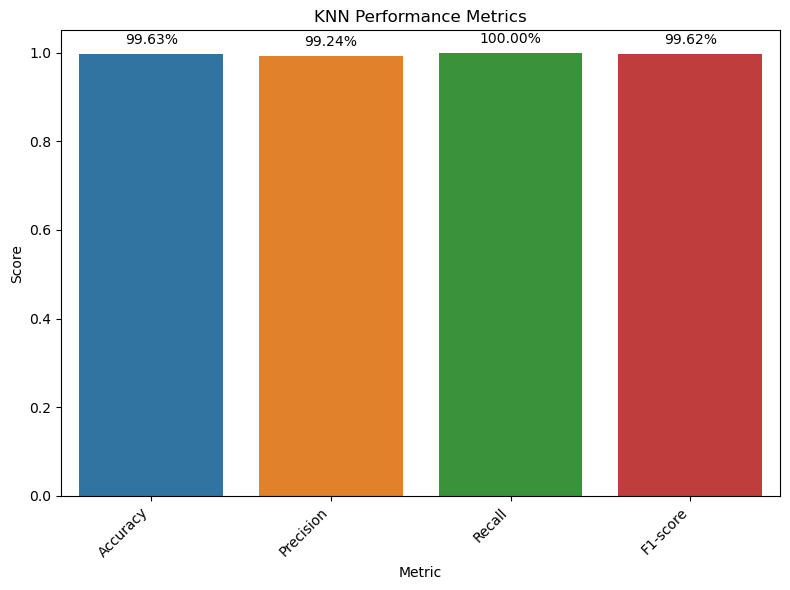

In [27]:
#For KNN:

# Train KNN model
knn_model.fit(X_train, y_train)

# Evaluate KNN model
knn_y_pred = knn_model.predict(X_test)

# Calculate performance metrics
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred)

# Create DataFrame for metrics
knn_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
})

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=knn_metrics, ax=ax)
ax.set_title('KNN Performance Metrics')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


# Model with the best performance 

In [28]:
import pandas as pd

# Store performance metrics
models_metrics = {
    'Random Forest': {
        'accuracy': rf_accuracy,
        'precision': precision_score(y_test, rf_y_pred),
        'recall': recall_score(y_test, rf_y_pred),
        'f1-score': f1_score(y_test, rf_y_pred)
    },
    'Logistic Regression': {
        'accuracy': lr_accuracy,
        'precision': precision_score(y_test, lr_y_pred),
        'recall': recall_score(y_test, lr_y_pred),
        'f1-score': f1_score(y_test, lr_y_pred)
    },
    'KNN': {
        'accuracy': knn_accuracy,
        'precision': precision_score(y_test, knn_y_pred),
        'recall': recall_score(y_test, knn_y_pred),
        'f1-score': f1_score(y_test, knn_y_pred)
    }
}

# Create DataFrame from metrics
metrics_df = pd.DataFrame(models_metrics).T  # Transpose to have models as rows

# Find the model with the best performance
best_model = metrics_df.idxmax().to_dict()

# Display the best model and its performance metrics
print("Best Model:", best_model['accuracy'])
print("Accuracy:", metrics_df.loc[best_model['accuracy'], 'accuracy'])
print("Precision:", metrics_df.loc[best_model['accuracy'], 'precision'])
print("Recall:", metrics_df.loc[best_model['accuracy'], 'recall'])
print("F1-score:", metrics_df.loc[best_model['accuracy'], 'f1-score'])



Best Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Managerial implications

In [29]:
## Managerial implications
best_model = 'Random Forest'
if best_model == 'Random Forest':
    print("Managerial Implication:")
    print("Implement a decision-making system based on the Random Forest model to classify mushrooms into edible and poisonous categories.")
    print("This system can be used for safety and quality control in the mushroom industry, helping to ensure that only edible mushrooms are distributed to consumers.")
else:
    print("No specific managerial implication derived.")

Managerial Implication:
Implement a decision-making system based on the Random Forest model to classify mushrooms into edible and poisonous categories.
This system can be used for safety and quality control in the mushroom industry, helping to ensure that only edible mushrooms are distributed to consumers.


# CONCLUSION


From the above visualization, we can see that the three models - Random Forest, Logistion Regression and KNN (all after performing feature selection using correlation) - have sameperformance metrics. Therefore, it is essential to consider additional factors to recommend the best model.

1. Random Forest (after feature selection):

    Interpretability: Moderate interpretability due to ensemble nature.
    Computational Resources: Moderate computational requirements.
    Conclusion: Balanced choice if interpretability is a priority and computational resources are limited.
2. Logistic Regression:

    Interpretability: High interpretability.
    Computational Resources: Low computational requirements.
    Conclusion: Preferred if interpretability is crucial, with efficient resource usage.
    
3. KNN:

    Interpretability: Low interpretability.
    Computational Resources: High computational requirements.
    Conclusion: Less preferable due to its computational complexity and lower interpretability compared to         Random Forest and Logistic Regression.